<a href="https://colab.research.google.com/github/404isabel/03MAIR-Algoritmos-de-optimizacion/blob/master/AG3/Isabel_Vazquez_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AG-Actividad Guiada 3

Nombre: Isabel Vázquez Trigás

https://github.com/404isabel/03MAIR-Algoritmos-de-optimizacion/tree/master/AG3


In [94]:
import urllib.request
file="swiss42.tsp"
urllib.request.urlretrieve("http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp",file)


('swiss42.tsp', <http.client.HTTPMessage at 0x7fce62cccc18>)

In [95]:
!pip install tsplib95

In [0]:
import tsplib95
import random
from math import e

problem = tsplib95.load_problem(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges()) 

#print("Nodos",Nodos)

In [103]:
print("Nodos",Nodos)
print("Aristas",Aristas)

Nodos [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
Aristas [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (

In [0]:
#Devuelve el factorial de un numero
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

In [105]:
#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos): 
  solucion = [0]
  for i in range(len(Nodos)-1):
    solucion = solucion + [random.choice(list(set(Nodos) - set({0}) - set(solucion)))]
  return solucion 



#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.wfunc(a,b)

#distancia(0,1,problem)

#Devuelve la distancia total de una trayectoria
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

solucion=crear_solucion(Nodos)
#print(solucion)
distancia_total(solucion,problem)

4987

#### Búsqueda aleatoria

In [106]:
def busquedaAleatoria(problem, N):
  
  Nodos = list(problem.get_nodes())
  
  mejor_solucion = []  
  mejor_distancia = 10e100 
  
  for i in range(N):
    solucion=crear_solucion(Nodos)
    
    distancia = distancia_total(solucion,problem)
    
    if distancia < mejor_distancia:
     
      mejor_solucion = solucion
      
      mejor_distancia = distancia
    
      
      
  print("Mejor solución :",mejor_solucion)   
  print("Mejor distancia :",mejor_distancia)

  return mejor_solucion
    
    
sol=busquedaAleatoria(problem, 100)   
    

Mejor solución : [0, 32, 10, 8, 26, 23, 21, 39, 40, 13, 16, 41, 20, 19, 31, 27, 30, 4, 3, 18, 12, 6, 37, 11, 36, 17, 1, 7, 14, 35, 34, 24, 29, 33, 22, 28, 9, 5, 15, 2, 38, 25]
Mejor distancia : 4072


#### Búsqueda local

In [107]:
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #print(solucion)
  mejor_solucion = []
  #mejor_distancia = 10e100
  mejor_distancia = float("infinity") #Modificación
  for i in range(1,len(solucion)-1):
    for j in range(i+1, len(solucion)):
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
      distancia_vecina = distancia_total(vecina, problem)
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion

solucion=crear_solucion(Nodos)
print(solucion)

nueva_solucion = genera_vecina(solucion) #Se ve cómo se han intercambiado 2 nodos
print(nueva_solucion)



[0, 29, 22, 33, 4, 1, 2, 21, 13, 28, 15, 35, 20, 41, 19, 37, 39, 34, 6, 3, 12, 32, 23, 9, 38, 31, 7, 11, 17, 25, 18, 36, 27, 14, 24, 30, 40, 5, 16, 10, 8, 26]
[0, 29, 22, 33, 4, 1, 2, 21, 13, 28, 15, 35, 20, 17, 19, 37, 39, 34, 6, 3, 12, 32, 23, 9, 38, 31, 7, 11, 41, 25, 18, 36, 27, 14, 24, 30, 40, 5, 16, 10, 8, 26]


In [111]:

def busqueda_local(problem, N):
  mejor_solucion = []
  mejor_distancia = float("infinity") #Modificación
  
  Nodos = list(problem.get_nodes())
  
  solucion_referencia = crear_solucion(Nodos)

  for i in range(N):
    vecina = genera_vecina(solucion_referencia)
    distancia_vecina = distancia_total(vecina, problem)
    
    if distancia_vecina < mejor_distancia:
      mejor_solucion = vecina
      mejor_distancia = distancia_vecina
      
    solucion_referencia = vecina
  
  print("Mejor solución:" , mejor_solucion) 
  print("Distancia     :" , mejor_distancia) 
  return mejor_solucion  
  
  

#Modificación: Le cambio el nombre a la variable para después usar esta solución en el gráfico
solLocal = busqueda_local(problem, 100)  



Mejor solución: [0, 31, 35, 36, 17, 7, 1, 3, 2, 4, 26, 5, 13, 19, 6, 27, 28, 29, 39, 21, 24, 40, 23, 41, 9, 8, 10, 18, 14, 16, 15, 37, 20, 33, 34, 12, 11, 25, 22, 38, 30, 32]
Distancia     : 1833


#### Recocido simulado

In [0]:
def genera_vecina_aleatorio(solucion):
  #Generador de 1 solucion vecina 2-opt (intercambiar 2 nodos)
  #Se puede mejorar haciendo que la elección no se uniforme sino entre las que estén más proximas
  i = random.choice(range(1, len(solucion)) )
  j = random.choice(list(set(range(1, len(solucion))) - {i}))
  vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]
  return vecina


def probabilidad(T,d):
  r=random.random()
  return r <= (e**(-1*d)/(T*1.0)) #Modificación para poner todo en 1 línea
  #if(r <= (e**(-1*d)/(T*1.0))):
  #  return True
  #else:
  #  return False
  
def bajar_temperatura(T):
  return T-1

In [113]:
def recocido_simulado(problem, TEMPERATURA):
  #problem = datos del problema
  #T = Temperatura
  
  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)
  
  mejor_solucion = []
  mejor_distancia = float("infinity") #Modificación
  
  while TEMPERATURA > 0:
    #Genera una solución vecina(aleatoria)
    vecina = genera_vecina_aleatorio(solucion_referencia)
    #vecina = genera_vecina(solucion_referencia)#Mejores soluciones
    
    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)
    
    #Si es la mejor solución de todas se guarda
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina
    
    #Si la nueva vecina es mejor, se cambia y si es peor se cambia según una probabilidad dependiente de T y de |distancia_referencia - distancia_vecina|
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    TEMPERATURA = bajar_temperatura(TEMPERATURA)
  
  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol = recocido_simulado(problem, 10000)

La mejor solución encontrada es [0, 27, 28, 29, 8, 41, 25, 11, 13, 19, 14, 16, 15, 37, 36, 35, 31, 17, 7, 1, 30, 39, 21, 24, 40, 23, 26, 5, 6, 2, 32, 34, 20, 33, 38, 22, 9, 10, 12, 18, 4, 3]
con una distancia total de 1732


#### Colonia de hormigas

In [0]:
import math
#Colonia de hormigas
def Add_Nodo(problem, H ,T ) : #H (hormiga):recorrido parcial      T:fermomona ---> mejorar este método, no se está teniendo en cuenta T (jugar con los dos parámetros, distancia y feromona)
  #Establecer una una funcion de probabilidad para 
  # añadir un nuevo nodo dependiendo de los nodos mas cercanos y de las feromonas depositadas
  #print(H)
  Nodos = list(problem.get_nodes())  
  return random.choice(   list(set(range(1,len(Nodos))) - set(H) )  ) #añade un nodo de modo aleatorio, debería ser en base a la feromona T

#Modificación: creo nuevo método para elegir el siguiente nodo, mediante una función de probabilidad que tenga en cuenta y las feromonas
def Add_Nodo_Mod(problem, H ,T, actual ) : 
  
  alfa=1.0 #Peso que se da al rastro
  beta=2.5 #Peso que se da a la distancia
  
  Nodos = list(problem.get_nodes()) 
  
  listaValores  = []
  listaValoresPesos = []  
  
  for i in range(len(Nodos)): 
    
    if len(T)>actual and i<len(T[actual]) :  
      
      feromona  = math.pow((T[actual][i]), alfa)
    
      #Distancia entre el nodo i y el último nodo de la hormiga     
      hormiga=H[actual]
      nodohormiga=hormiga[len(hormiga)-1]
      dist=(distancia(nodohormiga,Nodos[i],problem))
      #Divido entre 1 porque a menor distancia, mayor peso le quiero dar al nodo 
      # Lo multiplico *100 y posteriormente lo convertiré a entero para que funcione correctamente la función de calculo de probabilidad en base a pesos)
      if dist!=0:
        dist=1+(1/dist)*100            
      
      peso = math.pow(dist, beta) * feromona
      
      #Sólo añado el nodo si no existe previamente
      s=set(H[actual])
      if Nodos[i] not in s:        
        elem=(Nodos[i],peso)
        listaValoresPesos.append(elem)
  
  
  if(len(listaValoresPesos)>0):     
    listadoPesos = [nodo for nodo, peso in listaValoresPesos for i in range(int(peso))]     
    valor= random.choice(listadoPesos)
    return valor   
  else:
    return random.choice(list(set(range(1,len(Nodos))) - set(H[actual]) )  )
  

def Incrementa_Feromona(problem, T, H):
  #Incrementar segun la calidad de la solución. Añadir una cantidad inversamente proporcional a la distancia total 
  for i in range(len(H)-1):
    T[H[i]][H[i+1]] += 1000/distancia_total(H, problem) #más feromonas a las distancias más pequeñas  
  return T

def Evaporar_Feromonas(T):
  #Podemos elegir diferentes funciones de evaporación dependiendo de la cantidad actual y de la suma total de feromonas depositadas,...
  #Evapora 0.3 el valor de la feromona, sin que baje de 1    --> mejorable, podría hacerse en base al número de ciclos, etc...
  T = [[ max(T[i][j] - 0.3 , 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]
  return T

#Modificación: Intento de Función de evaporación de hormigas en función de los ciclos (Al final no la uso, porque no veo que mejore la función inicial)
def Evaporar_Feromonas_Mod(T,ciclos,N): 
  
  #Evaporar en función de los ciclos (lo multiplico * 2 para corregir el efecto que se produce en los primeros ciclos, sobretodo cuando hay muchos agentes. 
  #La evaporación era mínima y provocaba que el algoritmo no arrojase resultados tan óptimos):
  ratioEvaporacion=(ciclos/N)*2
  
  
  T = [[ max(T[i][j] - ratioEvaporacion , 1) for i in range(len(Nodos)) ] for j in range(len(Nodos))]
  return T




In [116]:
#problem = datos del problema
#N = Número de agentes(hormigas)
def hormigas(problem, N):
  #Nodos
  Nodos = list(problem.get_nodes())
  #Aristas
  Aristas = list(problem.get_edges()) 
  
  #Inicializa las aristas con una cantidad inicial de feromonas:1 (vector de 2 dimensiones)
  T = [[ 1 for _ in range(len(Nodos)) ] for _ in range(len(Nodos))]
  #print(T)
  
  #Se generan los agentes(hormigas) que serán estructuras de caminos desde 0
  Hormiga = [[0] for _ in range(N)]
  
  #Recorre cada agente construyendo la solución
  ciclos=0
  for h in range(N):    
    #Para cada agente se construye un camino
    for i in range(len(Nodos)-1):
      
      #Elige el siguiente nodo
      #Nuevo_Nodo = Add_Nodo(problem, Hormiga[h] ,T )
      Nuevo_Nodo = Add_Nodo_Mod(problem, Hormiga ,T, h )
      
      Hormiga[h].append(Nuevo_Nodo)     
    
    #Incrementa feromonas en esa arista 
    T = Incrementa_Feromona(problem, T, Hormiga[h] )
      
    #Evapora Feromonas  
    T = Evaporar_Feromonas(T)
    #T = Evaporar_Feromonas_Mod(T,ciclos,N)
    ciclos+=1

    #Seleccionamos el mejor agente
  mejor_solucion = []
  mejor_distancia = float("infinity")
  for h in range(N):
    distancia_actual = distancia_total(Hormiga[h], problem)
    if distancia_actual < mejor_distancia:
      mejor_solucion = Hormiga[h]
      mejor_distancia =distancia_actual
  
  
  print(mejor_solucion)
  print(mejor_distancia)
  
  
solucionHormigas=hormigas(problem, 1000)

[0, 1, 8, 28, 36, 37, 15, 16, 14, 6, 27, 2, 30, 29, 9, 22, 38, 24, 18, 12, 10, 25, 11, 41, 23, 39, 40, 21, 3, 4, 5, 7, 34, 33, 20, 13, 19, 26, 17, 31, 35, 32]
2413


#### Pruebas con distinto número de agentes para el problema de las hormigas

In [77]:
#Con 10 agentes
VECES=5
for i in range(VECES): 
  hormigas(problem, 10)  

[0, 3, 27, 2, 1, 37, 14, 15, 16, 17, 31, 28, 4, 5, 35, 36, 34, 20, 33, 30, 24, 21, 32, 39, 41, 23, 26, 6, 7, 9, 8, 19, 13, 18, 25, 10, 29, 38, 22, 12, 11, 40]
2813
[0, 29, 30, 28, 3, 4, 5, 31, 15, 13, 19, 37, 1, 17, 40, 21, 9, 2, 27, 34, 38, 22, 39, 24, 10, 25, 41, 23, 8, 18, 6, 36, 16, 14, 7, 12, 11, 26, 32, 33, 20, 35]
2673
[0, 1, 7, 17, 6, 4, 3, 2, 28, 27, 25, 10, 12, 11, 26, 5, 14, 16, 15, 33, 34, 20, 29, 21, 9, 23, 41, 36, 35, 19, 13, 37, 31, 32, 30, 8, 39, 38, 22, 18, 40, 24]
2593
[0, 1, 3, 6, 7, 15, 14, 16, 37, 17, 9, 8, 27, 2, 32, 28, 12, 18, 26, 5, 13, 23, 4, 29, 22, 25, 10, 41, 11, 33, 34, 35, 31, 20, 36, 30, 24, 40, 21, 39, 38, 19]
2751
[0, 3, 1, 6, 4, 37, 17, 31, 18, 29, 23, 41, 25, 12, 15, 16, 14, 32, 20, 33, 30, 19, 5, 26, 10, 22, 38, 24, 2, 27, 28, 11, 13, 7, 8, 9, 39, 40, 21, 35, 36, 34]
2807


In [78]:
#Con 42 agentes tantos agentes como nodos
VECES=5
for i in range(VECES): 
  hormigas(problem, 42)   

[0, 27, 2, 3, 6, 25, 11, 14, 16, 15, 37, 18, 12, 26, 13, 19, 28, 17, 31, 33, 29, 10, 41, 23, 9, 22, 38, 40, 24, 39, 21, 8, 4, 1, 5, 7, 36, 35, 20, 34, 32, 30]
2245
[0, 3, 27, 2, 6, 7, 4, 18, 29, 8, 10, 12, 11, 30, 28, 1, 32, 33, 20, 34, 31, 17, 37, 14, 16, 15, 19, 26, 5, 13, 25, 22, 38, 9, 23, 41, 24, 21, 40, 39, 36, 35]
2208
[0, 1, 6, 4, 28, 2, 27, 3, 30, 29, 19, 5, 12, 10, 25, 23, 41, 9, 39, 38, 8, 18, 37, 16, 14, 15, 31, 26, 13, 33, 34, 32, 11, 40, 21, 24, 22, 17, 7, 20, 35, 36]
2566
[0, 5, 16, 15, 7, 37, 14, 12, 11, 18, 10, 25, 8, 41, 9, 2, 27, 3, 4, 29, 39, 21, 24, 40, 23, 22, 38, 6, 1, 13, 19, 17, 35, 20, 34, 30, 28, 31, 36, 32, 33, 26]
2375
[0, 1, 6, 14, 15, 19, 5, 2, 27, 4, 3, 28, 13, 26, 31, 35, 36, 29, 30, 39, 23, 21, 40, 9, 8, 17, 37, 16, 7, 10, 25, 11, 41, 24, 12, 18, 33, 22, 38, 32, 34, 20]
2642


In [79]:
#Con 1000 agentes
VECES=5
for i in range(VECES): 
  hormigas(problem, 1000)   

[0, 37, 15, 14, 16, 29, 30, 28, 1, 6, 26, 5, 4, 13, 19, 31, 12, 11, 25, 3, 27, 2, 41, 23, 8, 10, 39, 9, 40, 24, 21, 22, 7, 20, 33, 34, 32, 17, 36, 35, 38, 18]
2486
[0, 18, 19, 16, 14, 15, 37, 35, 36, 2, 27, 5, 26, 11, 12, 10, 25, 22, 39, 8, 29, 30, 32, 28, 9, 21, 40, 38, 13, 6, 3, 1, 31, 17, 7, 4, 23, 41, 34, 33, 20, 24]
2669
[0, 30, 27, 2, 32, 29, 35, 31, 34, 4, 3, 18, 25, 11, 12, 5, 19, 13, 14, 16, 15, 26, 22, 28, 6, 1, 7, 37, 36, 20, 33, 39, 24, 40, 21, 8, 23, 9, 41, 10, 38, 17]
2573
[0, 2, 3, 27, 13, 16, 14, 15, 37, 25, 12, 11, 21, 40, 23, 41, 10, 1, 26, 18, 5, 31, 17, 20, 33, 34, 32, 35, 36, 19, 28, 24, 22, 39, 9, 8, 30, 38, 7, 6, 4, 29]
2507
[0, 6, 1, 18, 26, 19, 9, 8, 23, 41, 25, 10, 4, 3, 2, 27, 28, 38, 22, 24, 21, 39, 40, 30, 29, 13, 15, 14, 16, 17, 33, 34, 32, 12, 11, 7, 31, 20, 5, 35, 37, 36]
2544


In [80]:
#Con 5000 agentes
VECES=5
for i in range(VECES):  
  hormigas(problem, 5000) 

[0, 1, 7, 19, 5, 17, 32, 10, 4, 26, 13, 23, 41, 12, 11, 6, 2, 3, 27, 28, 30, 8, 18, 9, 29, 38, 20, 33, 34, 31, 15, 14, 16, 37, 36, 35, 22, 39, 40, 21, 24, 25]
2483
[0, 33, 20, 34, 32, 28, 27, 2, 4, 26, 13, 14, 16, 15, 37, 17, 31, 40, 21, 39, 23, 41, 11, 12, 8, 10, 25, 18, 3, 1, 30, 29, 9, 7, 24, 35, 36, 19, 5, 6, 38, 22]
2603
[0, 30, 10, 8, 9, 26, 1, 4, 6, 5, 15, 16, 14, 17, 3, 31, 7, 11, 12, 25, 41, 23, 21, 24, 40, 29, 19, 13, 18, 33, 34, 28, 27, 2, 36, 35, 20, 32, 38, 22, 39, 37]
2602
[0, 7, 12, 10, 3, 1, 2, 27, 28, 4, 26, 13, 19, 6, 32, 34, 33, 5, 38, 22, 21, 24, 40, 36, 17, 31, 15, 14, 16, 37, 20, 30, 29, 39, 9, 41, 8, 25, 23, 18, 11, 35]
2715
[0, 1, 2, 3, 27, 18, 26, 19, 13, 36, 31, 17, 5, 11, 12, 10, 29, 30, 7, 16, 14, 15, 37, 35, 34, 33, 20, 32, 9, 8, 21, 40, 23, 41, 25, 4, 6, 28, 38, 39, 22, 24]
2309


#### En vista de los datos, se observa una mejora sustancial entre usar 10 agentes o 42 (tantos agentes/hormigas como nodos). A partir de ahí, no se ven mejoras en usar más número de agentes. Además, vemos que usando 42 agentes obtenemos tiempos de ejecución bastante razonables.


#### Aplicación del algoritmo de las  hormigas a otros problemas:

El primer algoritmo de colonia de hormigas,  tenía como objetivo resolver el problema del viajante. 

Además, se ha visto que este algoritmo es útil en la resolución de los siguientes problemas:

- Problema de la mochila:

      El problema de la mochila consiste en seleccionar un conjunto de objetos de manera tal que el valor total de los objetos sea máximo y no supere un límite establecido (mochila).

      Para resolver el problema de la mochila usando el algoritmo de las hormigas:

      Se inicializa cada objeto con una cantidad mínima de feromonas.

      Cada hormiga se coloca en una posición aleatoria y va seleccionando cada nodo de forma iterativa y lo va agregando a la mochila. Los objetos totales no pueden sobrepasar la capacidad de la mochila.

      Por último se selecciona la mejor solución y se actualizan los rastros de las feromonas.

-  Para Optimización de estructuras de hormigón armado. (Reforzando aquellos elementos que se han empleado para la construcción, teniendo en cuenta la calidad de la solución.)
-  Para problemas de distribución en planta (Para buscar la mejor asignación espacial de estaciones o celdas de trabajo)
-  Para detectar fallos de programación
-  Tareas de supervisión de las máquinas de aprendizaje, encargadas de agrupar los grupos de objetos que son similares

Referencias:

https://es.wikipedia.org/wiki/Algoritmo_de_la_colonia_de_hormigas

https://www.agenciasinc.es/Noticias/Colonias-de-hormigas-detectan-fallos-de-programacion

http://www.academia.edu/3567732/ACHPM_ALGORITMO_DE_OPTIMIZACI%C3%93N_CON_COLONIA_DE_HORMIGAS_PARA_EL_PROBLEMA_DE_LA_MOCHILA

https://victoryepes.blogs.upv.es/tag/colonia-de-hormigas/

https://revistas.udistrital.edu.co/ojs/index.php/visele/article/view/11897

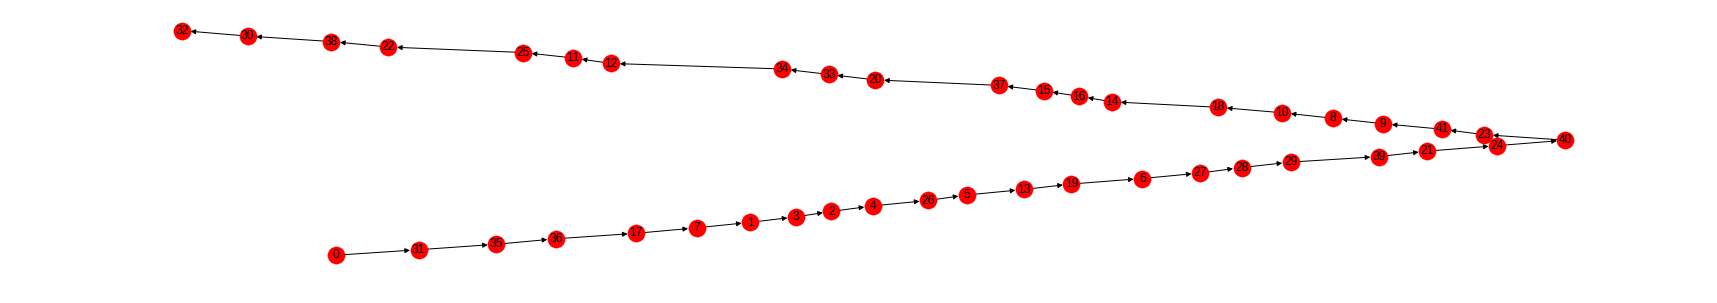

Camino :[0, 31, 35, 36, 17, 7, 1, 3, 2, 4, 26, 5, 13, 19, 6, 27, 28, 29, 39, 21, 24, 40, 23, 41, 9, 8, 10, 18, 14, 16, 15, 37, 20, 33, 34, 12, 11, 25, 22, 38, 30, 32]
Distancias :[66, 60, 39, 63, 40, 32, 23, 11, 18, 34, 15, 36, 25, 52, 37, 18, 27, 72, 26, 51, 49, 64, 19, 38, 28, 29, 44, 93, 8, 11, 22, 113, 24, 24, 168, 14, 28, 126, 36, 67, 46]


In [343]:
import matplotlib.pyplot as plt
import networkx as nx
import sys

#Gráfico para mostrar la solución, representando el camino, así como la distancia entre los nodos  
def dibujar(solucion):
  G = nx.DiGraph()
  G.clear()
  G.pos={}
  x=0
  y=0
  posiciones=[]
  tamanio=len(solucion)
  mitad=len(solucion)//2
  distancias=[] 
  i=0
  for elem in solucion:    
   
    #Posiciono el primer elemento en la coordenada (0,0)
    if(i==0):
        G.pos[elem]=(0,0)
        posiciones.append(0)
    #Para el resto de casos calculo la posición x en función de la distancia
    #Además voy sumando siempre el valor 30 para x e y para que una mejor visualización
    #y que no se queden los nodos apelotonados
    else:
      #Añado la arista del elemento anterior y este
      G.add_edge(solucion[i-1],solucion[i])
      #Calculo la distancia entre el nodo anterior y este
      dist=distancia(solucion[i],solucion[i-1],problem)
      #Añado la distancia al array
      distancias.append(dist)    
      
      #Para una mejor visualización, divido el gráfico en 2 partes, ya que si no no se visualiza correctamente, al haber tantos nodos
      #Si es menor que la mitad, voy a visualizar el gráfico de forma ascendente hacia la derecha
      if i<=mitad:
        y+=30
        x+=30
        posicionAnterior=posiciones[i-1]
        posicionActual=posicionAnterior+dist          
      #Si es menor que la mitad, hacia la izquierda y hacia arriba
      else:
        y+=30
        x-=30
        posicionAnterior=posiciones[i-1]
        posicionActual=posicionAnterior-dist      
      
      
      #Establezco la posición del nodo actual, y añado la posición a array
      G.pos[elem]=((posicionActual)+x,y)
      posiciones.append(posicionActual) 
    i+=1      
 
  #Visualizo la figura
  plt.figure(figsize=(30, 5))  
  pos = nx.spring_layout(G)
  nx.draw_networkx_edges(G, pos, arrows=True)
  nx.draw(G,G.pos, with_labels=True, size=1000,cmap=plt.cm.Reds_r) 
  plt.show()
  
  #Pinto, además el camino y las distancias para que se pueda comparar con el gráfico
  print("Camino :"+str(solucion))
  print("Distancias :"+str(distancias))
  
dibujar(solLocal)

